# ENG 122 Fall 2017 Midterm Exam

## Monday, November 6th

Rules:

- You may use any reference materials that you want: notes, books, internet, etc.
- The exam solution must be entirely your own independent work.
- **No discussion or collaboration whatsoever in any form with any other person is permitted via any means.**
- Do not share the exam with anyone.
- Academic dishonesty will not be tolerated and anyone caught violating the above rules will be referred to Student Judicial Affairs.

Instructions:

- Use code cells to do computations to solve the problems and use markdown cells to write any prose style answers. You may add cells as needed but the final answer should be displayed using the provided code/markdown cell.
- Do not include scratch work. Clean up the notebook into its essential parts and remove extraneous work.
- Do not leave any Python errors in the notebook and ensure that the entire notebook executes before submitting (run "kernel restart and run all".
- Use `%matplotlib inline` **not** `%matplotlib notebook` for your final submission.
- Use the assignments tab on bicycle.ucdavis.edu to submit your final work by 6:00 PM. Only submissions with a time stamp before 6:00 PM will be graded.
- Make sure to backup your work. If the server goes down you are responsible for your missing work. Download your exam periodically in case.

In [1]:
# use these imports or if necessary import other modules
import numpy as np
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt

# use inline for the submission, comment for interactivity
%matplotlib inline
# uncomment for interactive plots, comment out for submission
#%matplotlib notebook

# Problem 1 [20 points, 2 points each]

Below are a number of true and false questions. For each question enter `True` or `False` in a code cell below the statement and below that code cell briefly explain why you choose the answer.

# 1a)

You are given some data that shows an exponentially decaying vibration of a distance measurement. The time between any adjacent pair of peaks in the data is a constant value. The natural frequency in Hertz can be calculated by finding the inverse of the time between adjacent peaks.

In [2]:
### BEGIN SOLUTION
False
### END SOLUTION

False

You can only find the damped natural frequency from a decaying oscillation. The natural frequency can be found from an undamped oscillation.

# 1b)

The frequency of a overdamped free response of a system is the inverse of the period.

In [3]:
### BEGIN SOLUTION
False
### END SOLUTION

False

A overdamped damped free response has no oscillations, thus no period can be calculated.

# 1c)

When working with a quarter car model of a car's suspension, it is possible to tune the suspension within the underdamped regime such that the steady state amplitude of the absolute position of the car's mass is smaller in amplitude than the amplitude of the road height variation.

In [4]:
### BEGIN SOLUTION
True
### END SOLUTION

True

At high frequencies the displacement transmissibility drops below 1, thus the car's displacement is less than the road.

# 1d)

Given a compound pendulum with a centroidal inertia $I_c$, mass $m$, and a pivot point located $l$ from its center of mass, the center of percussion is located a distance from the pivot equivalent to the radius of a infinitely thin hoop of mass $m$ centered on the pivot point that has an inertia equal to $I_c + ml^2$.

In [5]:
### BEGIN SOLUTION
True
### END SOLUTION

True

The inertia of an infinitely thin hoop is $mr^2$, the same as a point mass located at distance $r$ from the pivot which would have a period that is the same as a simple pendulum.

# 1e

Given only the measured signal from a rate gyroscope that is attached to a rotationally vibrating system, you can determine the rotational inertia of the system the measurement was obtained from.

In [6]:
### BEGIN SOLUTION
False
### END SOLUTION

False

You must also know the stiffness if it is an undamped system and the damping coefficient if an underdamped system.

# 1f

The steady state frequency of a sinusoidally forced single degree of freedom system is slightly different than the forcing frequency if the system is underdamped but exactly the same if the system is undamped.

In [7]:
### BEGIN SOLUTION
False
### END SOLUTION

False

The steady state frequency of the system will be exactly the same as the forcing frequency regardless of damping.

# 1g

Given a sinusoidally forced underdamped single degree of freedom system, the steady state amplitude of the coordinate will be maximized if the system is forced at the natural frequency of the system.

In [8]:
### BEGIN SOLUTION
False
### END SOLUTION

False

The maximum amplitude is at a frequency just slightly less than the natural frequency.

# 1h

As the angular velocity of a single degree of freedom compound pendulum with Coulomb friction increases, the magnitude of the friction torque stays constant.

In [9]:
### BEGIN SOLUTION
True
### END SOLUTION

True

The torque is only a function of the sign of the angular velocity and the magnitude is constant.

# 1i

Any periodic function, linear or nonlinear, can be represented exactly by an infinite series of sines and cosines. So exact that if you could sum the infinite terms there would be no detectable difference in the representation and the actual function.

In [10]:
### BEGIN SOLUTION
True
### END SOLUTION

True

As the series goes to infinity the error between the function and the series goes to zero.

# 1j

Resonance can only be observed if there is damping in a system.

In [11]:
### BEGIN SOLUTION
False
### END SOLUTION

False

Undamped systems can also resonate.

# Problem 2 [40 points]

Your colleague collected some data from an accelerometer she installed on a hydro-electric generator your company maintains. The generator vibrates when medium to heavy flows activate the generator during rainfall events. The generator is mounted on vibration isolators but they do not really seem to be doing a good job. Your colleague provides you with a comma separated value file named `acceleration-data.csv` (in the same directory as this notebook). This file has has a single acceleration reading from the sensor showing the vibration of the generator just after the flow stops. Your job is to classify the vibration and provide some information so that the technicians can fix the problem.

# 2a [10 points]

Load the data from the file and plot the acceleration versus time. Make the plot as informative as you can. Describe what you observe in terms of vibrations from viewing the plot in the cell below the plot. What type of vibration is this?

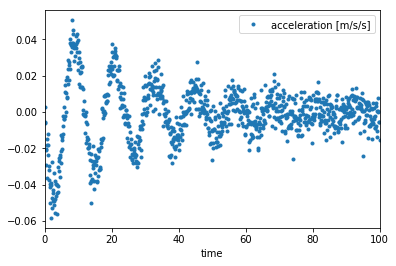

In [12]:
### BEGIN SOLUTION
s = pd.read_csv('acceleration-data.csv', index_col='time')
s.plot(style='.');
### END SOLUTION

The plot shows a very noisy decaying oscillation. This is an underdamped vibration. The period seems to be about 11.65 seconds.

# 2b [10 points]

Estimate the frequency of the dominant oscillation in Hertz from the data to as high of accuracy as you can.

In [13]:
### BEGIN SOLUTION
from scipy.optimize import curve_fit

def decay_osc(t, A, lam, w, phi):
    return A * np.exp(lam * t) * np.sin(w*t + phi)

popt, pcov = curve_fit(decay_osc, s.index, s['acceleration [m/s/s]'],
                       p0=(0.05, -0.001, 2 * np.pi / 11.65, 0.0))

popt[2] / 2 / np.pi  # Hertz
### END SOLUTION

0.083500836430873235

# 2c [10 points]

Using log decrement, determine what the time constant $\tau$ of this exponential decay is.

tau from log decrement is: 31.60 s
tau from fit: 31.09 s


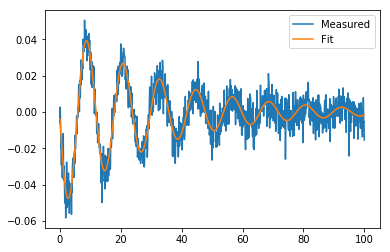

In [14]:
### BEGIN SOLUTION
T = 2 * np.pi / popt[2] # period from fit

# data from the measurement
x_t = float(s['acceleration [m/s/s]'][7.5:7.5 + 0.05])
x_tpT = float(s['acceleration [m/s/s]'][7.5 + T:7.5 + T + 0.08])

delta = np.log(x_t / x_tpT)  # = T/tau

tau = T / delta
print('tau from log decrement is: {:1.2f} s'.format(tau))

# from the fitted parameter
print('tau from fit: {:1.2f} s'.format(abs(1 / popt[1])))

# data with fitted curve
acc_fit = pd.Series(decay_osc(s.index, *popt), index=s.index)

plt.figure()
plt.plot(s.index, s, s.index, acc_fit)
plt.legend(['Measured', 'Fit']);
### END SOLUTION

# 2d [10 points]

Your colleague informed you that the mass of this generator is 400 kilograms and that it sits on top of a passive vibration isolator (spring, damper) that is supposed to suppress the vibrations completely. Using a system from the `resonance.linear_systems` package that you've used in class, determine what the critical damping value in kg/s is for this system such that it will not vibrate and report the value in a cell below your computation such that your colleague will know what to look for when shopping for a different isolation system. Gravity can be ignored because the system is vibrates around its equilibrium.

*Hint: Use an interactive plot to adjust the parameters of the system that affects the free response and find the values that cause the trajectory of the acceleration to match the data. Displaying the period on the plot may help.*

Your plot should take this form:

```python
traj = sys.free_response(100)

fig, ax = plt.subplots(1, 1)
ax.plot(acc_from_data.index, acc_from_data)  # make sure to use your variable names
lines = ax.plot(traj.index, ???)  # simulated acceleration
t = ax.text(20, -0.05, 'Period: {:1.1f} s'.format(???))
ax.legend(['Measured', 'Simulated'])
```

And your plot update function for the interactivity should look something like:

```python
def update_plot(???):  # relevant system parameters and ranges where ??? is
    # simulation and update the plot code here
    
from ipywidgets import interact

interact(update_plot, ???) # relevant system parameters and ranges where ??? is
```

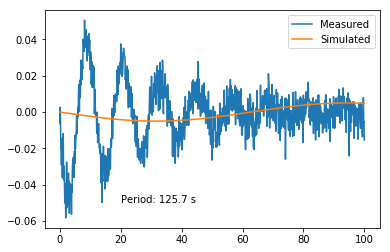

interactive(children=(IntSlider(value=250, description='c', max=500), IntSlider(value=100, description='k', max=200, min=1), IntSlider(value=5, description='x0', max=10), FloatSlider(value=0.0, description='v0', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

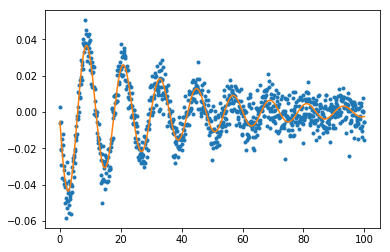

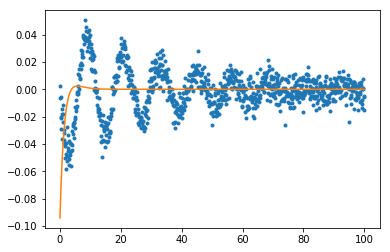

In [15]:
### BEGIN SOLUTION
from resonance.linear_systems import MassSpringDamperSystem

sys = MassSpringDamperSystem()

sys.constants['mass'] = 400  # kg
sys.constants['damping'] = 0.0  # kg/s
sys.constants['stiffness'] = 1.0  # N/m

sys.coordinates['position'] = 0.0  # m
sys.speeds['velocity'] = 0.1  # m/s

traj = sys.free_response(100)

fig, ax = plt.subplots(1, 1)
ax.plot(s.index, s)
lines = ax.plot(traj.index, traj.position_acc)
t = ax.text(20, -0.05, 'Period: {:1.1f} s'.format(sys.period()))
ax.legend(['Measured', 'Simulated'])

def update_plot(c, k, x0, v0):
    sys.constants['damping'] = c
    sys.constants['stiffness'] = k
    sys.coordinates['position'] = x0
    sys.speeds['velocity'] = v0
    sim = sys.free_response(100)
    lines[0].set_data(sim.index, sim.position_acc)
    t.set_text('Period: {:1.1f} s'.format(sys.period()))
    
from ipywidgets import interact
interact(update_plot, c=(0, 500), k=(1, 200), x0=(0, 10), v0=(0, 1, 0.01))

# after finding values to fit
sys.constants['damping'] = 23
sys.constants['stiffness'] = 109
sys.coordinates['position'] = 0.0
sys.speeds['velocity'] = 0.09
traj = sys.free_response(100)
plt.figure()
plt.plot(s.index, s, '.', traj.index, traj.position_acc);

# manipulate interactive slider for damping coeff to find critical damping
sys.constants['damping'] = 418  # kg/s, critical damping value
traj = sys.free_response(100)
plt.figure()
plt.plot(s.index, s, '.', traj.index, traj.position_acc);
### END SOLUTION

# Problem 3 [40 points]

You work at a automobile suspension design company. The force transmitted to the car from the suspension is known to be very uncomfortable to the passengers in the car and your company has set the maximum allowable force transmissibility to be $0.5$ for all the cars you produce when force transmissibility is defined as $\frac{F_{s}}{kY}$, where $F_{s}$ is the amplitude of the steady state force felt by the car if the vehicle is traveling over a sinusoidal road with an amplitude of $Y$. $k$ is the car's suspension stiffness. You also already know that you can you can keep the displacement transmisibility ratio $\frac{X}{Y}$ within $1\pm0.8$ so that the vehicle has a displacement amplitude $X$ similar to the roadway's displacement amplitude. If the car's total mass is $m=1600$ kg which is spread equally over the suspension of each wheel (set the mass to $400$ kg on quarter car system) and the viscous damping coefficient of a single damper installed at each wheel is $c=3000$ kg/s, what spring stiffness $k$ should you choose so that a car traveling between 1 mph and 60 mph over amplitude 0.1 meter bumps that are spaced about 10 meters apart (peak to peak) allows you can meet your two design criteria?

Use the `SimpleQuarterCarSystem` to simulate this system and determine your answer. You should demonstrate that your result works through the presentation of simulation and analysis using the tools you've learned in the class. In particular make a single plot with both displacement and force transmissiblities plotted versus speed together to show that your choice of suspension parameters ensures the criteria are met. Justify and explain your reasoning and results with text and graphics. Finally, comment on the behavior of the suspension force and car displacement if a driver drives faster than 60 mph.

In [16]:
from resonance.linear_systems import SimpleQuarterCarSystem

sys = SimpleQuarterCarSystem()

# 3a [10 points]

Setup all of the constants, coordinates, speeds, and measurements you will need. You may need to add additional constants to the system. Demonstrate that a suspension force, $F_s$, measurement works as expected.

In [17]:
### BEGIN SOLUTION
sys.constants['sprung_mass'] = 1600 / 4  # kg
sys.constants['suspension_damping'] = 3000  # kg/s
sys.constants['suspension_stiffness'] = 10000  # N/m
sys.constants['travel_speed'] = 18 # m/s, ~ 40 mph
sys.constants['bump_height'] = 0.05  # m
sys.constants['bump_distance'] = 10  # m

sys.coordinates['car_vertical_position'] = 0.0  # m
sys.speeds['car_vertical_velocity'] = 0.0  # m/s

def road_frequency(bump_distance, travel_speed):
    return travel_speed / bump_distance * 2 * np.pi  # rad /s

sys.add_measurement('road_frequency', road_frequency)

def road_height(bump_height, road_frequency, time):
    return bump_height * np.sin(road_frequency * time)

sys.add_measurement('road_height', road_height)

def road_height_vel(bump_height, road_frequency, time):
    return bump_height * road_frequency * np.cos(road_frequency * time)

sys.add_measurement('road_height_vel', road_height_vel)

def suspension_force(suspension_damping, suspension_stiffness,
                     road_height, road_height_vel,
                     car_vertical_position, car_vertical_velocity):
    return (suspension_damping * (car_vertical_velocity - road_height_vel) +
            suspension_stiffness * (car_vertical_position - road_height))

sys.add_measurement('suspension_force', suspension_force)

sys.measurements['suspension_force']
### END SOLUTION

-1696.4600329384884

# 3b [10 points]

Create three 1D arrays: 1) travel speed values of interest, 2) steady car displacement amplitudes corresponding to the speeds, and 3) steady state suspension force amplitudes corresponding to the speeds.

In [18]:
### BEGIN SOLUTION
speeds = np.linspace(1, 60, num=200)  # 1 to 125 mph

steady_state_disp_amps = []
steady_state_force_amps = []
for v in speeds:
    sys.constants['travel_speed'] = v
    Y = sys.constants['bump_height']
    wb = sys.measurements['road_frequency']
    traj = sys.sinusoidal_base_displacing_response(Y, wb, 2 * np.pi / wb * 6)
    X = traj[2 * np.pi / wb * 3:].car_vertical_position.max()
    F = traj[2 * np.pi / wb * 3:].suspension_force.max()
    steady_state_disp_amps.append(X)
    steady_state_force_amps.append(F)
    
steady_state_disp_amps = np.array(steady_state_disp_amps)
steady_state_force_amps = np.array(steady_state_force_amps)

print('Speeds', speeds)
print('Displacement Amplitudes', steady_state_disp_amps)
print('Suspension Force Amplitudes', steady_state_force_amps)
### END SOLUTION

Speeds [  1.           1.29648241   1.59296482   1.88944724   2.18592965
   2.48241206   2.77889447   3.07537688   3.3718593    3.66834171
   3.96482412   4.26130653   4.55778894   4.85427136   5.15075377
   5.44723618   5.74371859   6.04020101   6.33668342   6.63316583
   6.92964824   7.22613065   7.52261307   7.81909548   8.11557789
   8.4120603    8.70854271   9.00502513   9.30150754   9.59798995
   9.89447236  10.19095477  10.48743719  10.7839196   11.08040201
  11.37688442  11.67336683  11.96984925  12.26633166  12.56281407
  12.85929648  13.15577889  13.45226131  13.74874372  14.04522613
  14.34170854  14.63819095  14.93467337  15.23115578  15.52763819
  15.8241206   16.12060302  16.41708543  16.71356784  17.01005025
  17.30653266  17.60301508  17.89949749  18.1959799   18.49246231
  18.78894472  19.08542714  19.38190955  19.67839196  19.97487437
  20.27135678  20.5678392   20.86432161  21.16080402  21.45728643
  21.75376884  22.05025126  22.34673367  22.64321608  22.93969849
  2

# 3c [10 points]

Using a `semilogy` plot show both the displacement and force transmissibility curves as a function of speed. It should look something like:

```python
fig, ax = plt.subplots(1, 1)
ax.semilogy(???)  # disp trans. curve
ax.semilogy(???)  # force trans. curve
ax.set_xlabel('Speed [m/s]')
# code for the design criteria
ax.legend(???)
# boundary lines with:
ax.axhline(???)
...
```

Create horizontal and vertical lines to indicate your design criteria.

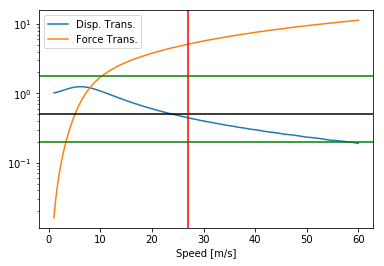

In [19]:
### BEGIN SOLUTION
fig, ax = plt.subplots(1, 1)
ax.semilogy(speeds, steady_state_disp_amps / sys.constants['bump_height'])
ax.semilogy(speeds, steady_state_force_amps / 
            sys.constants['suspension_stiffness'] / 
            sys.constants['bump_height'])
ax.legend(['Disp. Trans.', 'Force Trans.'])
ax.set_xlabel('Speed [m/s]')

ax.axhline(0.5, color='black')
ax.axhline(1.8, color='green')
ax.axhline(0.2, color='green')
ax.axvline(27, color='red');
### END SOLUTION

# 3d [10 points]

Explain your answer to the main prompt for this question here. Use the markdown and code cell as needed. Both may not be necessary depending on what you've presented above.

A stiffness of 330000 N/m will cause the resonant peak to shift to around 50 m/s (100 mph) and both the displacement and force transmissibility curves meet the design criteria. The displacement ratio stays between 1 and 1.5 below 60 mph and the force ratio stays below 0.5 below 60 mph. If the car travels at 100 mph resonance will occur causing just about a 4X increase in magnitude for both displacement and force ratio. At speeds higher that 100 mph the displacement ratio drops rapidly to below 1 and the force ratio drops then grows. Drivers shouldn't go that fast in this car if they want to feel comfortable! See the plot below for a visualization of the results.

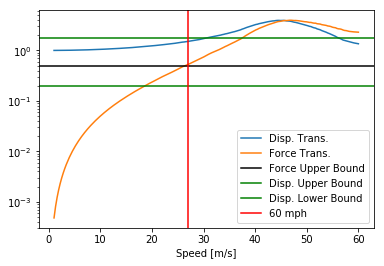

In [20]:
### BEGIN SOLUTION
# adjust this value to get the behavior you want
sys.constants['suspension_stiffness'] = 330000  # N/m

steady_state_disp_amps = []
steady_state_force_amps = []
for v in speeds:
    sys.constants['travel_speed'] = v
    Y = sys.constants['bump_height']
    wb = sys.measurements['road_frequency']
    traj = sys.sinusoidal_base_displacing_response(Y, wb, 2 * np.pi / wb * 6)
    X = traj[2 * np.pi / wb * 3:].car_vertical_position.max()
    F = traj[2 * np.pi / wb * 3:].suspension_force.max()
    steady_state_disp_amps.append(X)
    steady_state_force_amps.append(F)
    
steady_state_disp_amps = np.array(steady_state_disp_amps)
steady_state_force_amps = np.array(steady_state_force_amps)

fig, ax = plt.subplots(1, 1)
ax.semilogy(speeds, steady_state_disp_amps / sys.constants['bump_height'])
ax.semilogy(speeds, steady_state_force_amps / 
            sys.constants['suspension_stiffness'] / 
            sys.constants['bump_height'])
ax.set_xlabel('Speed [m/s]')

ax.axhline(0.5, color='black')
ax.axhline(1.8, color='green')
ax.axhline(0.2, color='green')
ax.axvline(27, color='red')

ax.legend(['Disp. Trans.', 'Force Trans.', 'Force Upper Bound', 
           'Disp. Upper Bound', 'Disp. Lower Bound', '60 mph']);
### END SOLUTION